# Error analysis

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import mlflow

%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 8)

## Config

In [2]:
# file paths
INPUT_DIR = Path("../input")

OUTPUT_DIR = Path("../output")

# data
TRAIN_DATA = INPUT_DIR / "train.csv"

# columns in the data
INDEX_COL = "Transaction_ID"

TARGET_COL = "MERCHANT_CATEGORIZED_AS"

# MLflow config
MLFLOW_TRACKING_URI = f"sqlite:///{OUTPUT_DIR}/mlruns.db"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

## Obtain actual labels

In [3]:
train_df = pd.read_csv(TRAIN_DATA, index_col=INDEX_COL)
y = train_df[TARGET_COL]

## Analysis

In [4]:
try:
    from src.predict import predict
except ImportError:
    import sys

    !{sys.executable} -m pip install -e .. -q

In [5]:
# helper function
from sklearn import metrics


def analyze(run_id: str) -> None:
    """Plot a confusion matrix for a specified model run"""
    # obtain class and probability predictions
    class_preds = predict(run_id, data_path=TRAIN_DATA, save_preds=False)
    class_preds.set_index(INDEX_COL, inplace=True)
    proba_preds = predict(run_id, data_path=TRAIN_DATA, proba=True, save_preds=False)
    proba_preds.set_index(INDEX_COL, inplace=True)

    # print log loss
    mapping = dict(zip(proba_preds.columns, range(proba_preds.shape[1])))
    log_loss = metrics.log_loss(y.map(mapping), proba_preds.values)
    print(f"Log loss: {log_loss:.5f}")

    # print classification report
    print(metrics.classification_report(y, class_preds))

    # plot confusion matrix
    metrics.ConfusionMatrixDisplay.from_predictions(
        y, class_preds, xticks_rotation="vertical"
    )

INFO: Finished 'predict' in 6.8793 seconds
INFO: Finished 'predict' in 0.7379 seconds


Log loss: 0.14898
                  precision    recall  f1-score   support

    Bills & Fees       0.97      1.00      0.99        78
     Data & WiFi       1.00      1.00      1.00        43
       Education       1.00      1.00      1.00         2
  Emergency fund       1.00      0.92      0.96        12
Family & Friends       1.00      0.98      0.99        41
       Going out       1.00      1.00      1.00        41
       Groceries       0.98      1.00      0.99        50
          Health       1.00      1.00      1.00         6
  Loan Repayment       1.00      1.00      1.00         5
   Miscellaneous       1.00      1.00      1.00        43
 Rent / Mortgage       1.00      1.00      1.00         2
        Shopping       1.00      1.00      1.00        21
Transport & Fuel       1.00      0.97      0.98        29

        accuracy                           0.99       373
       macro avg       1.00      0.99      0.99       373
    weighted avg       0.99      0.99      0.99     

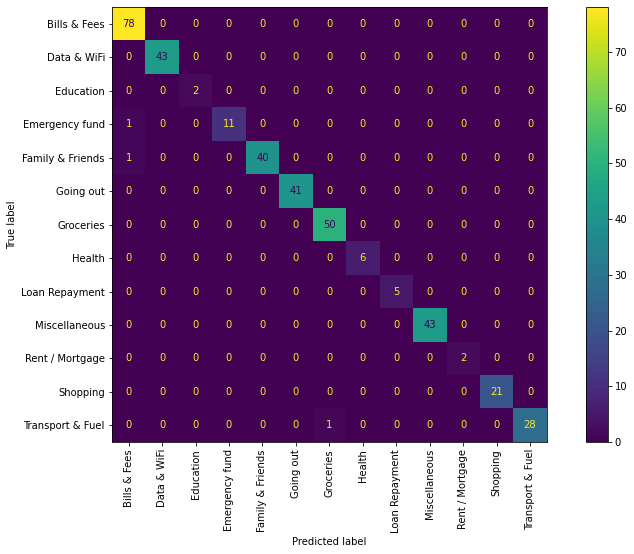

In [6]:
# histogram-based GBT
analyze("71e0f0e65613406d88c6e63129f8b5e5")

INFO: Finished 'predict' in 1.5964 seconds
INFO: Finished 'predict' in 0.5501 seconds


Log loss: 0.15129
                  precision    recall  f1-score   support

    Bills & Fees       0.99      1.00      0.99        78
     Data & WiFi       1.00      1.00      1.00        43
       Education       1.00      1.00      1.00         2
  Emergency fund       1.00      1.00      1.00        12
Family & Friends       1.00      0.98      0.99        41
       Going out       1.00      1.00      1.00        41
       Groceries       0.98      1.00      0.99        50
          Health       1.00      1.00      1.00         6
  Loan Repayment       1.00      1.00      1.00         5
   Miscellaneous       1.00      1.00      1.00        43
 Rent / Mortgage       1.00      1.00      1.00         2
        Shopping       1.00      1.00      1.00        21
Transport & Fuel       1.00      0.97      0.98        29

        accuracy                           0.99       373
       macro avg       1.00      1.00      1.00       373
    weighted avg       0.99      0.99      0.99     

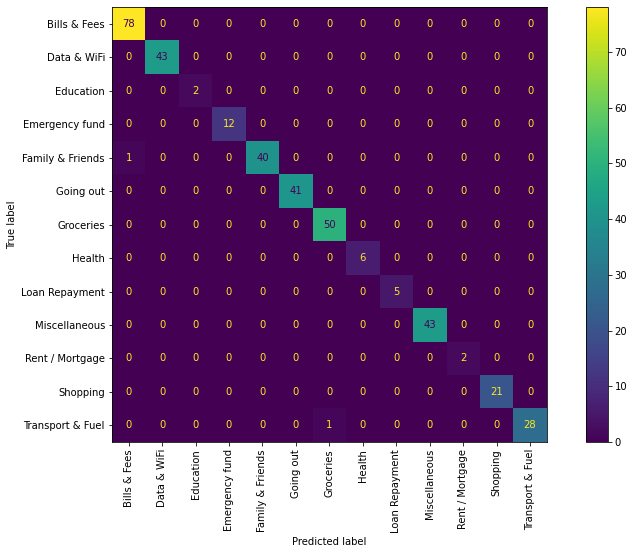

In [7]:
# LightGBM
analyze("7caceff48db9434695cc7850f11347af")

/home/harison/anaconda3/envs/alvin-smcc/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
INFO: Finished 'predict' in 3.6707 seconds
INFO: Finished 'predict' in 0.5721 seconds


Log loss: 0.53462
                  precision    recall  f1-score   support

    Bills & Fees       0.96      1.00      0.98        78
     Data & WiFi       0.96      1.00      0.98        43
       Education       1.00      1.00      1.00         2
  Emergency fund       1.00      0.92      0.96        12
Family & Friends       1.00      0.95      0.97        41
       Going out       0.98      1.00      0.99        41
       Groceries       0.96      1.00      0.98        50
          Health       1.00      0.83      0.91         6
  Loan Repayment       1.00      1.00      1.00         5
   Miscellaneous       1.00      0.95      0.98        43
 Rent / Mortgage       1.00      1.00      1.00         2
        Shopping       1.00      1.00      1.00        21
Transport & Fuel       1.00      0.93      0.96        29

        accuracy                           0.98       373
       macro avg       0.99      0.97      0.98       373
    weighted avg       0.98      0.98      0.98     

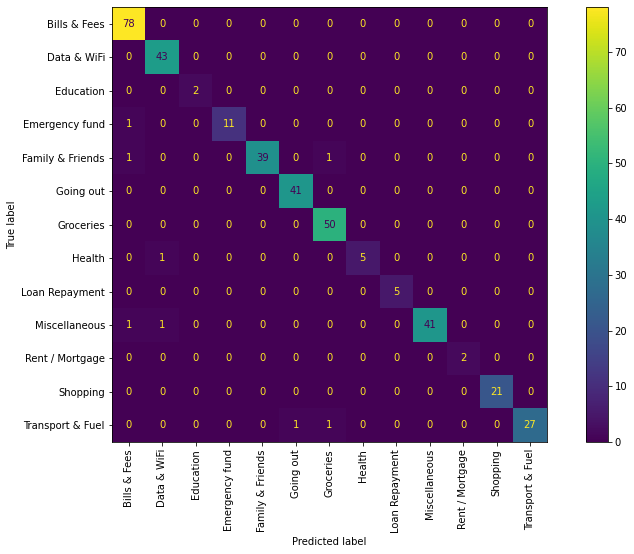

In [8]:
# CatBoost
analyze("5a150d8abae84d87944a3c947a14f68b")

INFO: Finished 'predict' in 1.0202 seconds
INFO: Finished 'predict' in 0.6112 seconds


Log loss: 0.17374
                  precision    recall  f1-score   support

    Bills & Fees       0.99      1.00      0.99        78
     Data & WiFi       1.00      1.00      1.00        43
       Education       1.00      1.00      1.00         2
  Emergency fund       1.00      1.00      1.00        12
Family & Friends       1.00      0.98      0.99        41
       Going out       1.00      1.00      1.00        41
       Groceries       0.98      1.00      0.99        50
          Health       1.00      1.00      1.00         6
  Loan Repayment       1.00      1.00      1.00         5
   Miscellaneous       1.00      1.00      1.00        43
 Rent / Mortgage       1.00      1.00      1.00         2
        Shopping       1.00      1.00      1.00        21
Transport & Fuel       1.00      0.97      0.98        29

        accuracy                           0.99       373
       macro avg       1.00      1.00      1.00       373
    weighted avg       0.99      0.99      0.99     

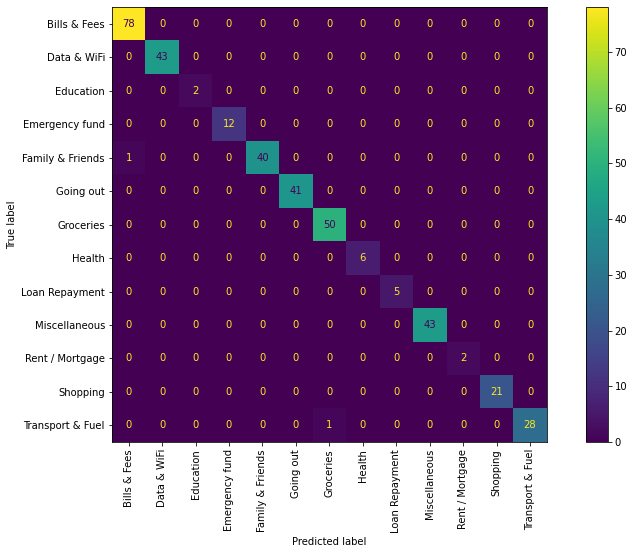

In [9]:
# XGBoost
analyze("ce4da2287b8f424eb974adfe7fa46086")